In [5]:
# 앞서 1장에서 k-최근접이웃 알고리즘을 이용해 모델을 학습시키고 예측값을 얻은 것이
# 제대로된 검증방법이라고 보기엔 부적절함 (모델이 이미 target 데이터로 정답을 알고 있기 때문)
# 학습된 모델에 새로운 데이터를 통해서 모델의 얼마나 잘 학습됐는지 알기 위해서
# 데이터를 훈련세트와 테스트세트로 나누어서
# 모델이 훈련세트로 학습하고 후에 테스트세트를 통해 제대로된 학습에 대한 검증을 해야함

In [8]:
# 1장에서 준비했었던 데이터셋을 다시 불러옴

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
                925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
                12.2, 19.7, 19.9]
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_target = [1]*35 + [0]*14

In [9]:
# 훈련세트와 테스트세트를 나눔

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 인스턴스 생성
kn = KNeighborsClassifier()

# 훈련세트로 학습시킴
kn = kn.fit(train_input, train_target)

# 테스트세트로 훈련된 모델이 잘 훈련되었는지 테스트
kn.score(test_input, test_target)

0.0

In [11]:
# 정확도가 0%로 앞장에서 나온 결과와 완전 반대되는 결과가 나옴

# 이유는 훈련세트에 슬라이싱되어 들어간 데이터가 도미 데이터 뿐이고
# 테스트세트에 슬라이싱되어 들어간 데이터가 빙어 데이터 뿐이기 때문

# 이러한 샘플링 편향을 해결하기 위해
# 두 데이터에 도미 데이터와 빙어 데이터가 잘 섞어줘야 함

In [12]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [13]:
input_arr.shape
# 결과는 아래(49 = 49개의 데이터를 뜻함, 2 = 0,1로 두개의 특성(길이,무게)이 있다는 것을 나타내줌)

(49, 2)

In [17]:
# 데이터 섞기

# 넘파이 arange함수를 사용하여 0~48까지의 인덱스를 만듬
index = np.arange(49)

# 인덱스를 넘파이 랜덤 셔플 메소드를 사용하여 섞음
np.random.shuffle(index)

In [19]:
# 섞여진 인덱스를 기준으로 훈련세트와 테스트세트를 슬라이싱 함

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

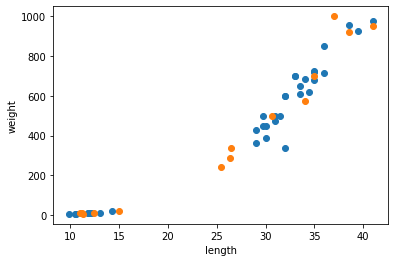

In [20]:
# 데이터가 잘 섞여졌는지 산점도로 데이터를 확인

import matplotlib.pyplot as plt

# 앞장에서 실행했던 산점도와 같이 산점도를 2개로 그리면 서로 다른 색으로 데이터를 표현함
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
# 슬라이싱에서 ":"는 모든 데이터를 시작부터 끝까지 가져온다는 것을 알 수 있음
# x축의 0은 length 값으로 길이에 해당되는 데이터이고
# y축의 1은 weight 값으로 무게에 해당되는 데이터임

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
# 훈련세트로 모델 훈련
kn = kn.fit(train_input, train_target)

# 훈련된 모델에게 테스트세트로 훈련이 잘 되었는지 확인
kn.score(test_input, test_target)

1.0

In [ ]:
# 값은 1.0로 100% 올바른 예측을 해냈다고 볼 수 있음